In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import os.path
from pathlib import Path
import cv2

In [92]:
dataTrain = Path("../input/handwriting-dataset/Advanced-Machine-Learning_Project-main/Data/Train Data")
filepath = list(dataTrain.glob(r"**/*.jpg"))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [93]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
labels = pd.Series(labels,name="Labels")
#drop Extraversion 
filepath = filepath.drop([*range(6)])
labels = labels.drop([*range(6)])

In [94]:
# Read the images and store it to ListA
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [95]:

ListA = pd.Series(ListA,name="Array")
ListA

0      [[118, 119, 114, 121, 118, 117, 118, 118, 117,...
1      [[128, 130, 128, 123, 129, 128, 124, 127, 124,...
2      [[180, 180, 182, 182, 180, 180, 181, 180, 179,...
3      [[178, 177, 176, 176, 181, 181, 178, 179, 179,...
4      [[172, 171, 172, 174, 173, 172, 171, 172, 172,...
                             ...                        
109    [[170, 169, 169, 169, 169, 169, 169, 168, 168,...
110    [[149, 148, 149, 153, 149, 149, 150, 152, 152,...
111    [[167, 166, 166, 166, 166, 165, 165, 168, 169,...
112    [[174, 173, 172, 171, 172, 172, 172, 171, 170,...
113    [[180, 180, 180, 180, 180, 179, 179, 179, 178,...
Name: Array, Length: 114, dtype: object

In [96]:
# Construct main data and copy it
MainData = pd.concat([ListA,labels],axis=1)
data = MainData.copy() # to protect main data

In [97]:
print(data["Labels"].value_counts())

Openness             50
Agreeableness        24
Neuroticism          24
Conscientiousness    16
Name: Labels, dtype: int64


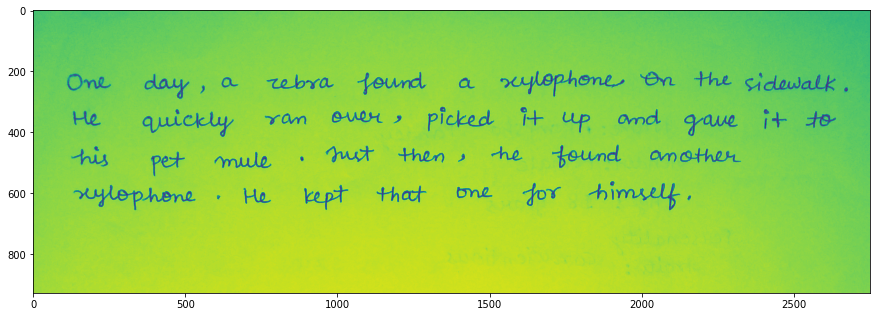

In [98]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][13])

In [99]:
data['Array'].iloc[0]

array([[118, 119, 114, ..., 111, 118, 111],
       [113, 123, 114, ..., 112, 114, 104],
       [113, 119, 116, ..., 112, 113, 102],
       ...,
       [171, 171, 172, ..., 148, 148, 140],
       [171, 172, 172, ..., 150, 152, 145],
       [170, 170, 171, ..., 149, 149, 141]], dtype=uint8)

**DATA FOR MODEL**

*Data Concat*

In [100]:
SecondData = pd.concat([filepath,labels],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
SecondData.head()

,Filepath,Labels
6,../input/handwriting-dataset/Advanced-Machine-...,Conscientiousness
7,../input/handwriting-dataset/Advanced-Machine-...,Conscientiousness
8,../input/handwriting-dataset/Advanced-Machine-...,Conscientiousness
9,../input/handwriting-dataset/Advanced-Machine-...,Conscientiousness
10,../input/handwriting-dataset/Advanced-Machine-...,Conscientiousness


**X & Y Values**

In [101]:
x = SecondData["Filepath"]
y = SecondData["Labels"]

In [102]:
# Encode categorized variables, similar to Getdummy
encode = LabelEncoder()
x = encode.fit_transform(x)
x

array([ 32,  27,  39,  25,  30,  38,  31,  26,  29,  28,  34,  37,  35,
        36,  33,  24,   3,  23,  22,   6,  13,  14,  17,   0,  10,  12,
        18,  19,  11,  20,   1,   8,   4,   9,   7,  16,   5,   2,  15,
        21,  47,  44,  60,  63,  46,  41,  56,  53,  58,  50,  62,  55,
        51,  43,  61,  59,  57,  45,  52,  40,  42,  48,  54,  49,  83,
        75,  93, 113, 101, 100,  74,  73,  70, 106, 112,  94,  77, 104,
        69, 110,  65,  80,  92, 103,  89,  87,  95,  84,  67,  90,  99,
        85,  82,  64,  88,  72,  98,  79,  76,  78, 108,  86, 102,  66,
        91,  97, 107,  96,  68, 109,  71,  81, 105, 111])

In [103]:
y = encode.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [104]:
x = x/max(x)

In [105]:
# convert type to float and reshape x and y
x = np.asarray(x).astype("float32")
x = x.reshape(114,1,1)
y = np.asarray(y).astype("float32")
y = y.reshape(114,1,1)

In [106]:
print("X len: {}\ny len: {}".format(len(x), len(y)))

X len: 114
y len: 114


**Splitting Training & Testing**

In [107]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [108]:
print("Training Data:\n\tX Train: {}\n\ty Train: {}\nTest Data:\n\tX Test: {}\n\ty Test: {}".format(xTrain.shape, 
                                                                                                    yTrain.shape,
                                                                                                    xTest.shape,
                                                                                                    yTest.shape))

Training Data:
	X Train: (102, 1, 1)
	y Train: (102, 1, 1)
Test Data:
	X Test: (12, 1, 1)
	y Test: (12, 1, 1)


In [109]:
ANNmodel = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./max(xTrain)), 
  tf.keras.layers.Flatten(input_shape=(102,)), 
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [110]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [111]:
ANN = ANNmodel.fit(xTrain, yTrain, epochs=60, batch_size=32, verbose=1, validation_data=(xTest,yTest))

Epoch 1/60


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4/4 [==============================] - 1s 69ms/step - loss: 1.3273 - accuracy: 0.4216 - val_loss: 1.2830 - val_accuracy: 0.4167
Epoch 2/60
4/4 [==============================] - 0s 14ms/step - loss: 1.2387 - accuracy: 0.4412 - val_loss: 1.2336 - val_accuracy: 0.4167
Epoch 3/60
4/4 [==============================] - 0s 14ms/step - loss: 1.1724 - accuracy: 0.4412 - val_loss: 1.2158 - val_accuracy: 0.4167
Epoch 4/60
4/4 [==============================] - 0s 14ms/step - loss: 1.1440 - accuracy: 0.4412 - val_loss: 1.1961 - val_accuracy: 0.4167
Epoch 5/60
4/4 [==============================] - 0s 15ms/step - loss: 1.1227 - accuracy: 0.4412 - val_loss: 1.1794 - val_accuracy: 0.4167
Epoch 6/60
4/4 [==============================] - 0s 14ms/step - loss: 1.0928 - accuracy: 0.4412 - val_loss: 1.1666 - val_accuracy: 0.4167
Epoch 7/60
4/4 [==============================] - 0s 15ms/step - loss: 1.0904 - accuracy: 0.4412 - val_loss: 1.1563 - val_accuracy: 0.4167
Epoch 8/60
4/4 [======================

In [112]:
Ann_result =  ANNmodel.evaluate(xTest,yTest)

1/1 [==============================] - 0s 33ms/step - loss: 0.5806 - accuracy: 0.8333


In [113]:
ANNmodel.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 1, 1)              0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                

In [114]:
HistoryDict = ANN.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

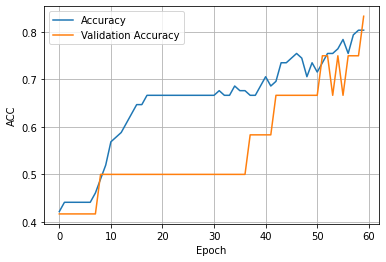

In [115]:
plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.ylabel("ACC")
plt.xlabel("Epoch")
plt.legend()
plt.grid()

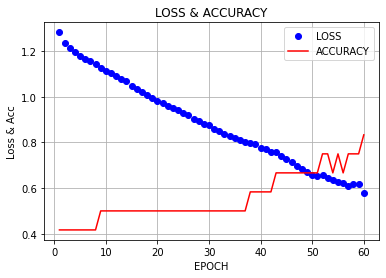

In [116]:
plt.plot(epochs,val_losses,"bo",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.grid()
plt.show()

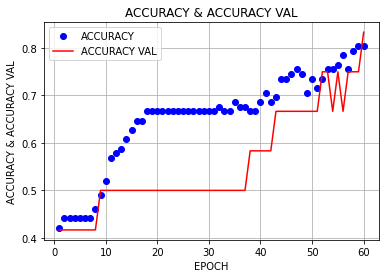

In [117]:
plt.plot(epochs,acc,"bo",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.grid()
plt.show()

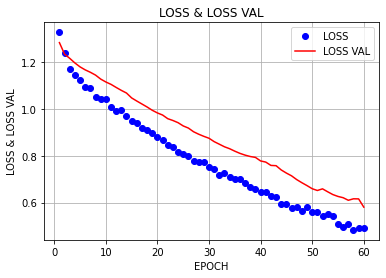

In [118]:
plt.plot(epochs,losses,"bo",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.grid()
plt.show()

**Testing Dataset**

In [119]:
dataTest = Path("../input/handwriting-dataset/Advanced-Machine-Learning_Project-main/Data/Test Data")
filepath_test = list(dataTrain.glob(r"**/*.jpg"))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [120]:
filepath_test = pd.Series(filepath_test, name='Filepath').astype(str)
labels_test = pd.Series(labels_test,name="Labels")
#drop Extraversion 
filepath_test = filepath_test.drop([34,35])
labels_test = labels_test.drop([34,35])

In [121]:
ListA_test = []
for i in filepath_test:
    image = cv2.imread(i,0)
    ListA_test.append(np.array(image,"uint8"))
ListA_test = pd.Series(ListA_test, name="Array")
ListA_test[0:5]

0    [[130, 133, 129, 132, 129, 128, 130, 128, 125,...
1    [[135, 135, 134, 134, 131, 135, 137, 135, 137,...
2    [[144, 145, 143, 143, 145, 143, 140, 140, 141,...
3    [[128, 128, 127, 126, 127, 125, 121, 120, 119,...
4    [[45, 46, 46, 51, 51, 51, 54, 53, 51, 58, 53, ...
Name: Array, dtype: object

In [122]:
ListA_test

0      [[130, 133, 129, 132, 129, 128, 130, 128, 125,...
1      [[135, 135, 134, 134, 131, 135, 137, 135, 137,...
2      [[144, 145, 143, 143, 145, 143, 140, 140, 141,...
3      [[128, 128, 127, 126, 127, 125, 121, 120, 119,...
4      [[45, 46, 46, 51, 51, 51, 54, 53, 51, 58, 53, ...
                             ...                        
113    [[170, 169, 169, 169, 169, 169, 169, 168, 168,...
114    [[149, 148, 149, 153, 149, 149, 150, 152, 152,...
115    [[167, 166, 166, 166, 166, 165, 165, 168, 169,...
116    [[174, 173, 172, 171, 172, 172, 172, 171, 170,...
117    [[180, 180, 180, 180, 180, 179, 179, 179, 178,...
Name: Array, Length: 118, dtype: object

In [123]:
MainData_test = pd.concat([ListA_test, labels_test],axis=1)
data_test = MainData_test.copy()

0      Conscientiousness
1      Conscientiousness
2      Conscientiousness
3      Conscientiousness
4      Conscientiousness
             ...        
114                  NaN
115                  NaN
116                  NaN
117                  NaN
118                  NaN
Name: Labels, Length: 117, dtype: object


In [145]:
DataTst = pd.concat([filepath_test,labels_test],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
x_tst = SecondDataTst["Filepath"][:110]
y_tst = SecondDataTst["Labels"][:110]

# Encode categorized variables, similar to Getdummy
encode = LabelEncoder()
x_tst = encode.fit_transform(x_tst)
y_tst = encode.fit_transform(y_tst)

#scale Xs
x_tst = x_tst / max(x_tst)

# convert type to float and reshape x and y
x_tst = np.asarray(x_tst).astype("float32")
x_tst = x_tst.reshape(110,1,1)
y_tst = np.asarray(y_tst).astype("float32")
y_tst = y_tst.reshape(110,1,1)

In [146]:
ANNmodel_test = tf.keras.models.Sequential([
  # inputs 
  #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255
  tf.keras.layers.experimental.preprocessing.Rescaling(1./max(x)), 
  tf.keras.layers.Flatten(input_shape=(118,)), # converting Matrix to single array, input shape = train data shape
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'), #128 nodes
  #tf.keras.layers.Dropout(0.2),  #This is some kind of regularization to prevent overfitting.
  tf.keras.layers.Dense(64, activation='relu'), #64 nodes
  #tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(4, activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel_test.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [147]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [148]:
ANN_test = ANNmodel_test.fit(x, y, epochs=60, batch_size=32, verbose=1)

Epoch 1/60
4/4 [==============================] - 1s 3ms/step - loss: 1.3617 - accuracy: 0.3333
Epoch 2/60
4/4 [==============================] - 0s 3ms/step - loss: 1.2887 - accuracy: 0.4386
Epoch 3/60
4/4 [==============================] - 0s 3ms/step - loss: 1.2467 - accuracy: 0.4386
Epoch 4/60
4/4 [==============================] - 0s 3ms/step - loss: 1.2116 - accuracy: 0.4386
Epoch 5/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1839 - accuracy: 0.4386
Epoch 6/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1590 - accuracy: 0.4386
Epoch 7/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1370 - accuracy: 0.4386
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1165 - accuracy: 0.4386
Epoch 9/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.4386
Epoch 10/60
4/4 [==============================] - 0s 3ms/step - loss: 1.0843 - accuracy: 0.4386
Epoch 11/60
4/4 [======================

In [149]:
result_test = ANNmodel_test.evaluate(x_tst, y_tst)
result_test

4/4 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.6364


[0.7152041792869568, 0.6363636255264282]

In [150]:
HistoryDict_test = ANN_test.history

tst_losses = HistoryDict_test["loss"]
tst_acc = HistoryDict_test["accuracy"]
epochs = range(1,len(tst_losses)+1)

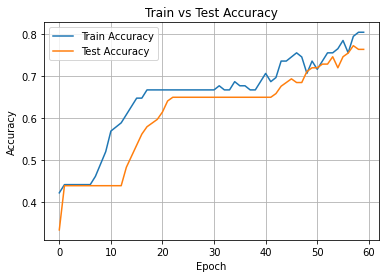

In [151]:
plt.plot(acc, label="Train Accuracy")
plt.plot(tst_acc, label="Test Accuracy")
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid()

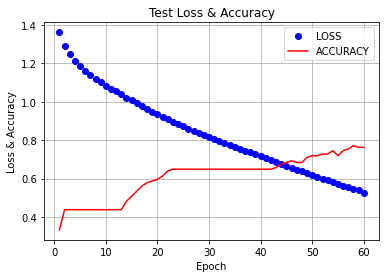

In [152]:
plt.plot(epochs,tst_losses,"bo",label="LOSS")
plt.plot(epochs,tst_acc,"r",label="ACCURACY")
plt.title("Test Loss & Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.grid()
plt.show()

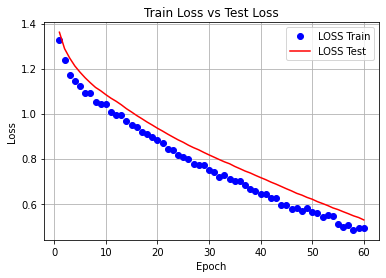

In [153]:
plt.plot(epochs,losses,"bo",label="LOSS Train")
plt.plot(epochs,tst_losses,"r",label="LOSS Test")
plt.title("Train Loss vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [154]:
prob_result = ANNmodel_test.predict(x_tst, batch_size=32, verbose=1)
prob_result

4/4 [==============================] - 0s 3ms/step


array([[3.09564888e-01, 2.89939821e-01, 2.67191142e-01, 1.33304149e-01],
       [4.67979997e-01, 2.95070529e-01, 1.59375161e-01, 7.75742754e-02],
       [4.06237036e-01, 3.00965071e-01, 1.96782708e-01, 9.60152522e-02],
       [1.66701585e-01, 2.29149804e-01, 3.87880653e-01, 2.16268063e-01],
       [2.51233846e-01, 2.71561950e-01, 3.15100849e-01, 1.62103370e-01],
       [8.85491073e-02, 1.65382400e-01, 4.57326144e-01, 2.88742363e-01],
       [3.61255944e-01, 2.98848510e-01, 2.27857262e-01, 1.12038359e-01],
       [5.05975544e-01, 2.86800206e-01, 1.39275625e-01, 6.79486394e-02],
       [1.04455054e-01, 1.81087568e-01, 4.44128931e-01, 2.70328432e-01],
       [5.38722456e-01, 2.76554435e-01, 1.23971514e-01, 6.07515834e-02],
       [4.27987009e-01, 3.00190061e-01, 1.82840541e-01, 8.89824107e-02],
       [1.22245505e-01, 1.96967795e-01, 4.28393334e-01, 2.52393335e-01],
       [3.83989185e-01, 3.00725311e-01, 2.11677164e-01, 1.03608273e-01],
       [5.22703469e-01, 2.81887829e-01, 1.31246015e

In [159]:
y_pred_classes = np.array([np.argmax(i) for i in prob_result]).astype("float32")
y_pred_classes = np.reshape(y_pred_classes, (110,1,1))
y_pred_classes.shape


(110, 1, 1)

In [160]:
import sklearn.metrics as skm


y_true = np.reshape(y_tst, (y_tst.shape[0], 1))
y_pred = np.reshape(y_pred_classes, (y_pred_classes.shape[0], 1))

cm = skm.multilabel_confusion_matrix(y_true, y_pred)
cm

array([[[71, 17],
        [ 4, 18]],

       [[94,  0],
        [16,  0]],

       [[75, 11],
        [18,  6]],

       [[50, 12],
        [ 2, 46]]])

In [161]:
print(skm.classification_report(y_true,y_pred, target_names= ["Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]))

                   precision    recall  f1-score   support

    Agreeableness       0.51      0.82      0.63        22
Conscientiousness       0.00      0.00      0.00        16
      Neuroticism       0.35      0.25      0.29        24
         Openness       0.79      0.96      0.87        48

         accuracy                           0.64       110
        macro avg       0.42      0.51      0.45       110
     weighted avg       0.53      0.64      0.57       110



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
